In [1]:
using Turing, StatsPlots, Random

In [2]:
Turing.setprogress!(false)

┌ Info: [Turing]: progress logging is disabled globally
└ @ Turing D:\Programs\julia_depot\packages\Turing\dl9my\src\Turing.jl:23
┌ Info: [AdvancedVI]: global PROGRESS is set as false
└ @ AdvancedVI D:\Programs\julia_depot\packages\AdvancedVI\hVQ2g\src\AdvancedVI.jl:15


false

In [3]:
Random.seed!(12112022)

TaskLocalRNG()

In [4]:
y = [(n^2 ÷ 7) % 10 for n=2700:2740]

41-element Vector{Int64}:
 8
 0
 2
 4
 6
 9
 2
 5
 9
 3
 7
 1
 6
 ⋮
 0
 0
 0
 0
 1
 2
 3
 5
 7
 9
 1
 4

In [5]:
N = length(y)
K = 10

10

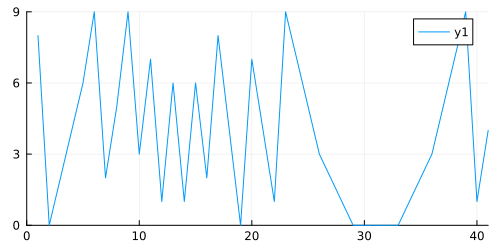

In [6]:
plot(y; xlim=(0, N), ylim=(0,9), size=(500,250))

In [7]:
@model function HMM(y, K)
    N = length(y) # observed sequence length
    s = tzeros(Int, N) # state sequence
    m = Vector(undef, K) # emission matrix
    T = Vector{Vector}(undef, K) # transition matrix
    
    # assign priors to matrices
    for i in 1:K
        T[i] ~ Dirichlet(ones(K) / K)
        m[i] ~ Normal(i, 0.5)
    end
    
    # observe inputs
    s[1] ~ Categorical(K)
    y[1] ~ Normal(m[s[1]], 0.1)
    
    for i in 2:N
        s[i] ~ Categorical(vec(T[s[i - 1]]))
        y[i] ~ Normal(m[s[i]], 0.1)
    end
end;
    
    
    

In [10]:
g = Gibbs(HMC(0.01, 50, :m, :T), PG(120, :s))
chn = sample(HMM(y, K), g, 10);

In [13]:
m_set = MCMCChains.group(chn, :m).value

3-dimensional AxisArray{Float64,3,...} with axes:
    :iter, 1:1:10
    :var, [Symbol("m[1]"), Symbol("m[2]"), Symbol("m[3]"), Symbol("m[4]"), Symbol("m[5]"), Symbol("m[6]"), Symbol("m[7]"), Symbol("m[8]"), Symbol("m[9]"), Symbol("m[10]")]
    :chain, 1:1
And data, a 10×10×1 Array{Float64, 3}:
[:, :, 1] =
  1.31922     1.78768  3.97772  …  2.65119  2.27665  4.70698  9.65464
 -0.0966162   1.63467  4.39957     2.94999  2.88168  5.72415  9.0325
 -0.0717921   1.58518  4.40909     3.15508  1.88159  5.77839  7.8714
 -0.0391547   1.60216  4.66389     3.2633   2.61287  5.63469  8.75166
  0.0645175   1.59156  4.33405     3.75787  3.29216  6.16171  9.15828
 -0.0294111   1.56453  4.375    …  3.85244  4.58647  5.71686  9.11808
  0.00588553  1.56283  4.03174     4.12563  3.65318  6.17577  9.08974
  0.00182742  1.57156  4.54782     4.65921  3.43077  6.30768  9.04073
  0.0429551   1.56685  4.74867     4.33296  3.67273  6.74952  9.04549
 -0.0448346   1.5694   3.60604     5.70932  3.67834  6.28224  9.0

In [14]:
s_set = MCMCChains.group(chn, :s).value

3-dimensional AxisArray{Float64,3,...} with axes:
    :iter, 1:1:10
    :var, [Symbol("s[1]"), Symbol("s[2]"), Symbol("s[3]"), Symbol("s[4]"), Symbol("s[5]"), Symbol("s[6]"), Symbol("s[7]"), Symbol("s[8]"), Symbol("s[9]"), Symbol("s[10]")  …  Symbol("s[32]"), Symbol("s[33]"), Symbol("s[34]"), Symbol("s[35]"), Symbol("s[36]"), Symbol("s[37]"), Symbol("s[38]"), Symbol("s[39]"), Symbol("s[40]"), Symbol("s[41]")]
    :chain, 1:1
And data, a 10×41×1 Array{Float64, 3}:
[:, :, 1] =
 4.0  2.0  6.0  9.0  9.0  10.0  2.0  …  6.0  7.0  5.0  10.0   9.0  6.0  9.0
 4.0  2.0  8.0  9.0  9.0  10.0  2.0     6.0  7.0  5.0  10.0   9.0  2.0  3.0
 4.0  2.0  8.0  9.0  9.0  10.0  2.0     6.0  7.0  5.0  10.0   9.0  6.0  9.0
 4.0  2.0  6.0  7.0  5.0  10.0  2.0     2.0  6.0  9.0   9.0  10.0  2.0  3.0
 4.0  2.0  6.0  7.0  5.0  10.0  2.0     6.0  8.0  9.0   9.0   4.0  2.0  9.0
 4.0  2.0  6.0  7.0  5.0  10.0  2.0  …  6.0  8.0  9.0   9.0   4.0  2.0  8.0
 4.0  2.0  6.0  9.0  9.0  10.0  2.0     2.0  8.0  9.0   9.0  10.

In [17]:
Ns = 10:length(chn)

10:10

┌ Info: Saved animation to C:\Users\stefa\Dropbox\Jotun Hein - Part C Projects\Manolache\Code\Evolutionary Toroidal Difussions\TorusEvol\src\tmp.gif
└ @ Plots D:\Programs\julia_depot\packages\Plots\gzYVM\src\animation.jl:149


Plots.AnimatedGif("C:\\Users\\stefa\\Dropbox\\Jotun Hein - Part C Projects\\Manolache\\Code\\Evolutionary Toroidal Difussions\\TorusEvol\\src\\tmp.gif")
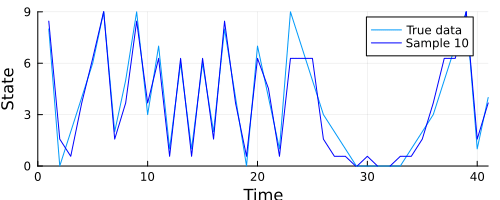

In [18]:
animation = @gif for i in Ns
    m = m_set[i, :]
    s = Int.(s_set[i, :])
    emissions = m[s]
    
    p = plot(
        y;
        chn=:red,
        size=(500,200),
        xlabel="Time",
        ylabel="State",
        legend=:topright,
        label="True data",
        xlim=(0, N),
        ylim=(0, 9))
    plot!(emissions; color=:blue, label="Sample $i")
end every 3